In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import datetime

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 일일 지역별 코로나 현황 파일
df1 = pd.read_csv('./data/TimeProvince.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [4]:
df1.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [5]:
df1.shape

(2261, 6)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2261 non-null   object
 1   time       2261 non-null   int64 
 2   province   2261 non-null   object
 3   confirmed  2261 non-null   int64 
 4   released   2261 non-null   int64 
 5   deceased   2261 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 106.1+ KB


In [7]:
# 서울 유동 인구 파일
df2 = pd.read_csv('./data/SeoulFloating.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [8]:
df2.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [9]:
df2.shape

(864000, 7)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        864000 non-null  object
 1   hour        864000 non-null  int64 
 2   birth_year  864000 non-null  int64 
 3   sex         864000 non-null  object
 4   province    864000 non-null  object
 5   city        864000 non-null  object
 6   fp_num      864000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 46.1+ MB


In [11]:
# 서울의 코로나 현황(서울 지역만 골라냄)
df1_seoul = df1[df1['province']=='Seoul']

In [12]:
# index 초기화
df1_seoul.head().reset_index(drop=True)

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-21,16,Seoul,0,0,0
2,2020-01-22,16,Seoul,0,0,0
3,2020-01-23,16,Seoul,0,0,0
4,2020-01-24,16,Seoul,0,0,0


In [13]:
df1_seoul.shape

(133, 6)

In [14]:
df1_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 2244
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   time       133 non-null    int64 
 2   province   133 non-null    object
 3   confirmed  133 non-null    int64 
 4   released   133 non-null    int64 
 5   deceased   133 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 7.3+ KB


In [15]:
# 서울 유동인구의 시작 날짜 조정(비교를 위해)
df2_date = df2[df2['date'] >= df1_seoul.iloc[0,0]]

In [16]:
df2_date.head()

,date,hour,birth_year,sex,province,city,fp_num
136800,2020-01-20,0,20,female,Seoul,Dobong-gu,21740
136801,2020-01-20,0,20,male,Seoul,Dobong-gu,22110
136802,2020-01-20,0,20,female,Seoul,Dongdaemun-gu,28330
136803,2020-01-20,0,20,male,Seoul,Dongdaemun-gu,29610
136804,2020-01-20,0,20,female,Seoul,Dongjag-gu,32570


In [17]:
# 서울 코로나 현황의 끝 날짜 조정(비교를 위해) 그리고 index는 초기화
df1_seoul_date = df1_seoul[df1_seoul['date'] <= df2_date.iloc[-1,0]].reset_index(drop=True)

In [18]:
df1_seoul_date.tail()

,date,time,province,confirmed,released,deceased
97,2020-04-26,0,Seoul,629,388,2
98,2020-04-27,0,Seoul,629,393,2
99,2020-04-28,0,Seoul,633,427,2
100,2020-04-29,0,Seoul,633,437,2
101,2020-04-30,0,Seoul,633,453,2


In [19]:
df1_seoul_date.shape

(102, 6)

In [20]:
# 일일 확진자수 열 생성
df1_seoul_date['confirmed_day'] = df1_seoul_date['confirmed']

In [21]:
df1_seoul_date.shape

(102, 7)

In [22]:
# 일일 확진자수 계산
for i in range(df1_seoul_date.shape[0]):
    if i == 0:
        df1_seoul_date.iloc[0, 6] = df1_seoul_date.iloc[0, 3]
    elif i >= 1:
        df1_seoul_date.iloc[i, 6] = df1_seoul_date.iloc[i, 3] - df1_seoul_date.iloc[i-1, 3]

In [23]:
df1_seoul_date.tail()

,date,time,province,confirmed,released,deceased,confirmed_day
97,2020-04-26,0,Seoul,629,388,2,0
98,2020-04-27,0,Seoul,629,393,2,0
99,2020-04-28,0,Seoul,633,427,2,4
100,2020-04-29,0,Seoul,633,437,2,0
101,2020-04-30,0,Seoul,633,453,2,0


In [24]:
# 서울 일일 확진자수를 구하기 위해 필요한 열만 추출
df1_seoul_date = df1_seoul_date[['date', 'province', 'confirmed_day']]

In [25]:
df1_seoul_date.tail()

,date,province,confirmed_day
97,2020-04-26,Seoul,0
98,2020-04-27,Seoul,0
99,2020-04-28,Seoul,4
100,2020-04-29,Seoul,0
101,2020-04-30,Seoul,0


In [26]:
df1_seoul_date.shape

(102, 3)

In [27]:
# 서울의 해당 날짜의 유동인구의 평균을 구하기 위해 그룹핑, 그리고 필요한 열만 추출 후 인덱스 초기화
df2_date_groupby = df2_date.groupby(['date', 'province']).mean()[['fp_num']].reset_index()

In [28]:
df2_date_groupby.tail()

,date,province,fp_num
96,2020-04-26,Seoul,26272.093056
97,2020-04-27,Seoul,27666.208333
98,2020-04-28,Seoul,27650.079167
99,2020-04-29,Seoul,27569.431944
100,2020-04-30,Seoul,25926.244444


In [29]:
df2_date_groupby.shape

(101, 3)

In [30]:
df2_date_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      101 non-null    object 
 1   province  101 non-null    object 
 2   fp_num    101 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [31]:
# 서울 일일 확진자수 데이터 프레임과 서울 일일 유동인구 데이터 프레임 합침
df_merge = pd.merge(df1_seoul_date, df2_date_groupby)

In [32]:
df_merge.shape

(101, 4)

In [33]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           101 non-null    object 
 1   province       101 non-null    object 
 2   confirmed_day  101 non-null    int64  
 3   fp_num         101 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


In [34]:
df_merge.head()

,date,province,confirmed_day,fp_num
0,2020-01-20,Seoul,0,28224.613889
1,2020-01-21,Seoul,0,28207.688889
2,2020-01-22,Seoul,0,28109.941667
3,2020-01-23,Seoul,0,27354.609722
4,2020-01-24,Seoul,0,24460.348611


In [35]:
df_merge.tail()

,date,province,confirmed_day,fp_num
96,2020-04-26,Seoul,0,26272.093056
97,2020-04-27,Seoul,0,27666.208333
98,2020-04-28,Seoul,4,27650.079167
99,2020-04-29,Seoul,0,27569.431944
100,2020-04-30,Seoul,0,25926.244444


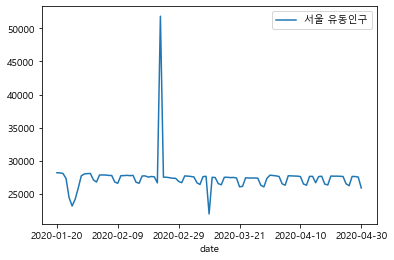

In [36]:
# 서울 일일 유동인구 시각화
df_merge.plot(x='date', y='fp_num', label='서울 유동인구')

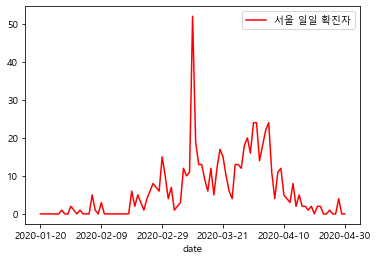

In [37]:
# 서울 일일 확진자 시각화
df_merge.plot(x='date', y='confirmed_day', c='r',label='서울 일일 확진자')

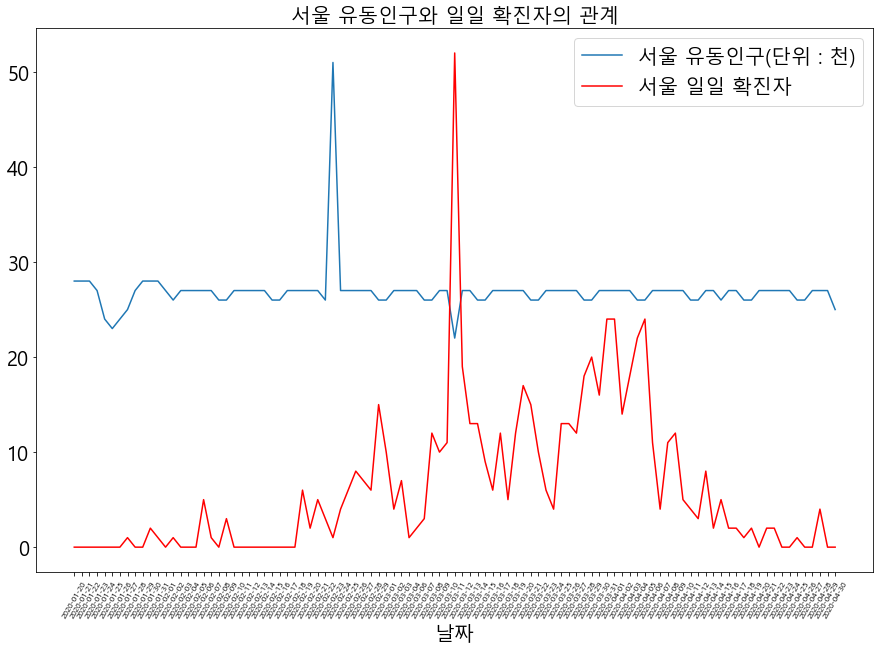

In [38]:
# 서울 유동인구와 일일 확진자의 관계(하나로 표현)
plt.figure(figsize=(15, 10))
plt.plot(df_merge['date'], df_merge['fp_num']//1000, label='서울 유동인구(단위 : 천)')
plt.plot(df_merge['date'], df_merge['confirmed_day'], 'r-', label='서울 일일 확진자')
plt.xlabel('날짜', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()


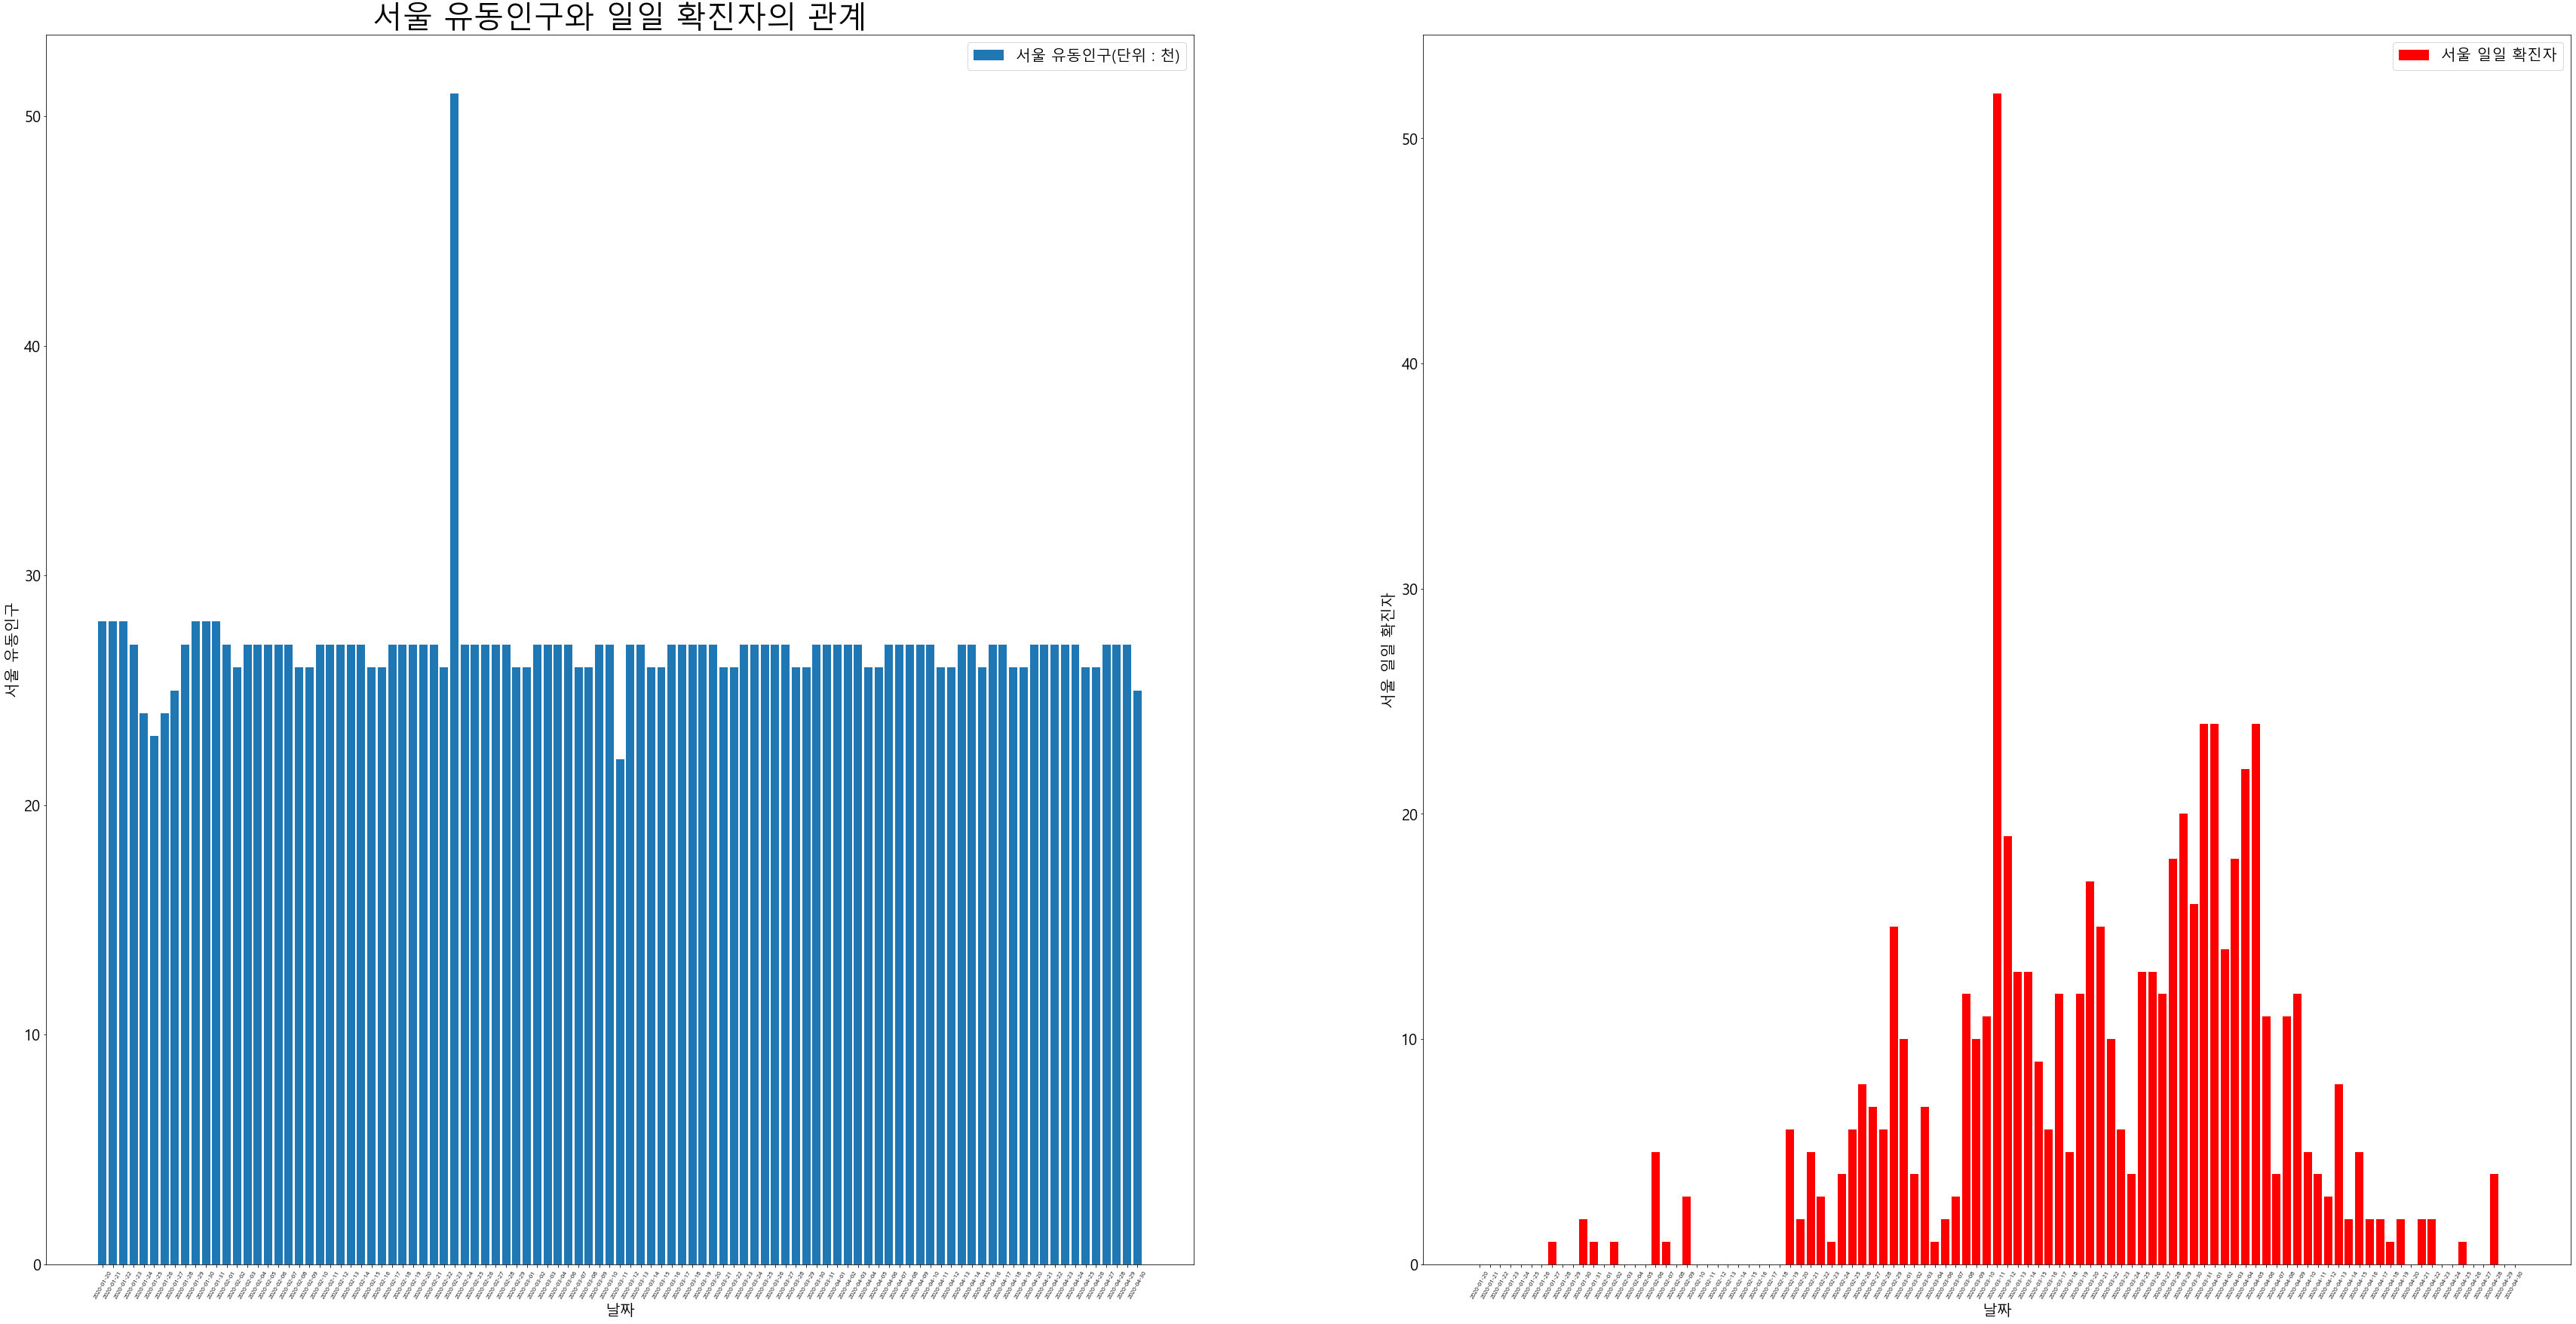

In [39]:
# 서울 유동인구와 일일 확진자의 관계(subplot)
plt.figure(figsize=(60, 30))
plt.subplot(1,2,1)
plt.bar(df_merge['date'], df_merge['fp_num']//1000, label='서울 유동인구(단위 : 천)')
plt.xlabel('날짜', fontsize=20)
plt.ylabel('서울 유동인구', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=40)
plt.legend(loc='upper right', fontsize=20)

plt.subplot(1,2,2)
plt.bar(df_merge['date'], df_merge['confirmed_day'],label='서울 일일 확진자', color='red')
plt.xlabel('날짜', fontsize=20)
plt.ylabel('서울 일일 확진자', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()

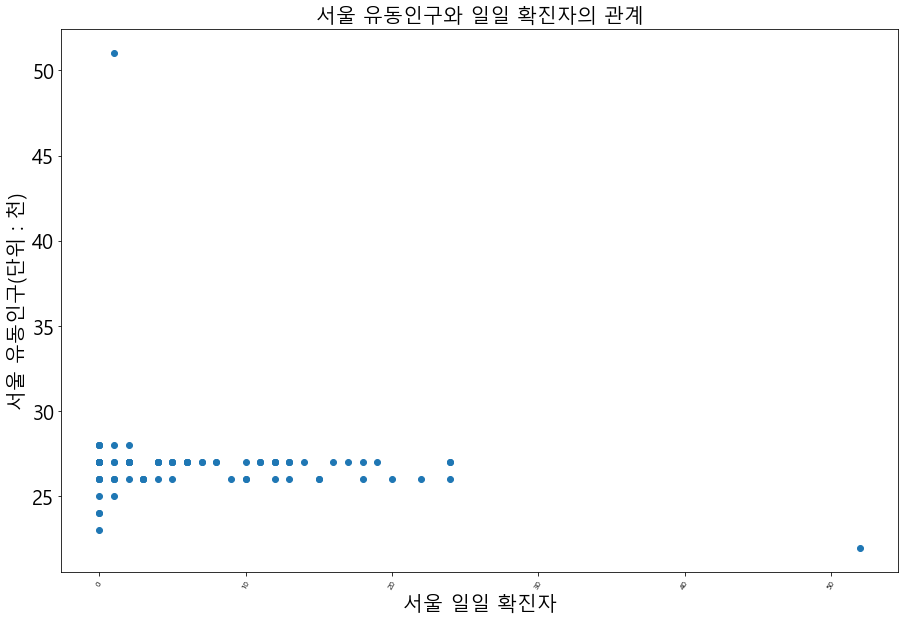

In [40]:
# 서울 유동인구와 일일 확진자의 관계 산점도(하나로 표현)
plt.figure(figsize=(15, 10))
plt.scatter(df_merge['confirmed_day'], df_merge['fp_num']//1000)
plt.xlabel('서울 일일 확진자', fontsize=20)
plt.ylabel('서울 유동인구(단위 : 천)', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=20)
plt.show()

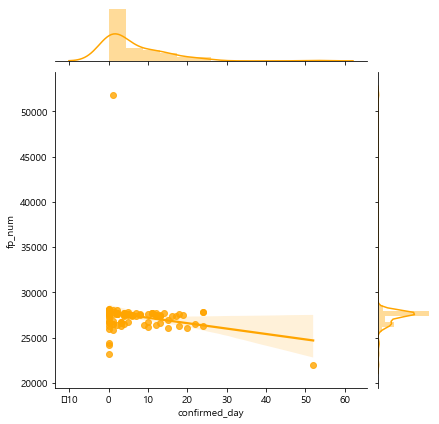

In [41]:
sns.jointplot(x='confirmed_day',y='fp_num',data=df_merge,color='orange',kind='reg')
plt.show()

In [43]:
# 일일 확진자수와 유동인구 독립성 결정
# stat, p_val, degFree, expected = st.chi2_contingency(df_merge[['confirmed_day','fp_num']])    # 통계량, p-값, 자유도, 기대도수.
# print("p_value : {}".format(np.round(p_val,3)))

p_value : 0.0


In [44]:
# 피어슨 상관계수
np.round(st.pearsonr(df_merge['confirmed_day'],df_merge['fp_num']),3) # 상관계수와 p-값.

array([-0.182,  0.069])

In [45]:
# 스피어맨 상관계수
np.round(st.spearmanr(df_merge['confirmed_day'],df_merge['fp_num']),3)  # 상관계수와 p-값.

array([-0.268,  0.007])

In [46]:
# 캔달 상관계수
np.round(st.kendalltau(df_merge['confirmed_day'],df_merge['fp_num']),3) # 상관계수와 p-값.

array([-0.201,  0.004])